<a href="https://colab.research.google.com/github/DrDourado/Teaching_ME_615/blob/main/ME_615_02_fundamentals_of_parametric_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:** Demonstrate basic parametric classification concepts using the Iris dataset.

**Topics Covered:**

1. Decision Rule and Decision Boundaries:
* Sign function (linear classifier).
* Logistic regression.
* Visualizing decision boundaries.
2. Impact of User Choices:
* Loss functions: MSE, Maximum Likelihood, Binary Cross-Entropy.
* Regularization effects on performance.
3. Classifier Metrics:
* Accuracy, Precision, Recall, F1-score, and Confusion Matrix.


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
# function to automatically save generated figures (credit to Aurelien Geron "Hands-On Machine Learning with Scikit-Learn & Tensorflow")
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**Loading and Exploring the Dataset**

* The Iris dataset contains features (sepal & petal length/width) for three flower species.
* We convert it into a binary classification problem (Setosa vs. Non-Setosa).

In [5]:
# Load the Iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # Class labels: 0 (Setosa), 1 (Versicolor), 2 (Virginica)

# Convert to binary classification (Setosa vs. non-Setosa)
y_binary = (y != 0).astype(int)  # 0 -> Setosa, 1 -> Versicolor or Virginica

# Display dataset
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Summary statistics
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for missing values
X.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


**Decision Rule and Decision Boundaries**

1. ***Sign Function (Linear Classifier)*** :
* The sign function classifier is a simple linear decision rule:
$y=sign(𝛚^{T} \times X + b)$
* The decision boundary is a straight line dividing the classes.
2. ***Logistic Regression*** :
* Logistic regression estimates probabilities instead of hard decisions:
$𝑃(𝑦=1∣𝑋)=\frac{1}{1+𝑒^{−(𝛚 \times 𝑋 + 𝑏)}}$
* The decision boundary smoothly transitions from class 0 to class 1.


In [8]:
# Select two features for visualization
X_simple = X[['petal length (cm)', 'petal width (cm)']]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_binary, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

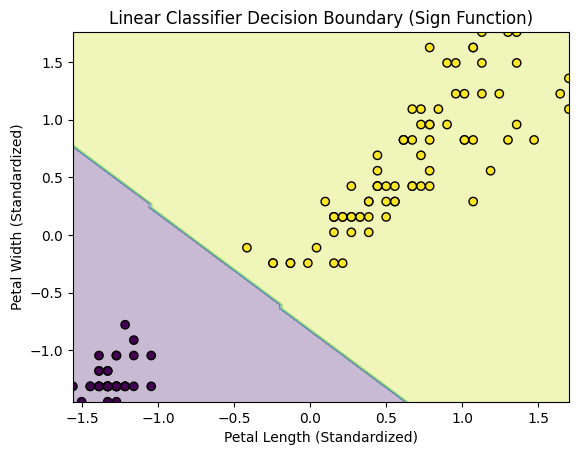

Saving figure linear_classifier_decision_boundary_sign


<Figure size 640x480 with 0 Axes>

In [9]:
# Train Perceptron (linear classifier using sign function)
perceptron = Perceptron()
perceptron.fit(X_train_scaled, y_train)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100),
                     np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k')
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.title("Linear Classifier Decision Boundary (Sign Function)")
plt.show()
save_fig("linear_classifier_decision_boundary_sign")

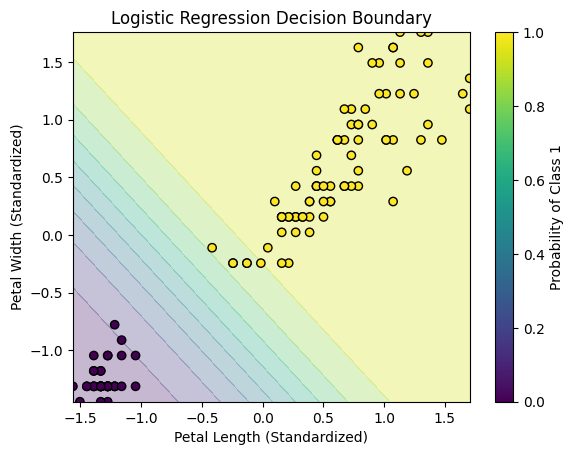

Saving figure logistic_regression_decision_boundary


<Figure size 640x480 with 0 Axes>

In [10]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict probability grid
Z_log = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_log, alpha=0.3, levels=np.linspace(0, 1, 10))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k')
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.title("Logistic Regression Decision Boundary")
plt.colorbar(label="Probability of Class 1")
plt.show()
save_fig("logistic_regression_decision_boundary")

**Impact of Loss Functions**

1. ***Mean Squared Error (MSE)*** :
* MSE Loss is used in regression but can be applied to classification
* MSE treats misclassifications as squared errors
2. ***Maximum Likelihood & Binary Cross-Entropy (BCE)*** :
* Binary Cross-Entropy (BCE) measures the log-likelihood of correct classification:
$𝐿 = − \frac{1}{N}∑[𝑦 \times log⁡(pred) + (1−𝑦) \times log(1−pred)]$

In [11]:
# Predict probabilities
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute MSE loss
mse_loss = mean_squared_error(y_test, y_prob)
print(f"MSE Loss: {mse_loss:.4f}")

MSE Loss: 0.0013


In [12]:
# Compute binary cross-entropy loss
bce_loss = log_loss(y_test, y_prob)
print(f"Binary Cross-Entropy Loss: {bce_loss:.4f}")

Binary Cross-Entropy Loss: 0.0256


**Impact of Regularization**
* *L1 Regularization (Lasso)* : removes irrelevant features.
* *L2 Regularization (Ridge)* : prevents overfitting by penalizing large weights.

In [13]:
# Train logistic regression with L1 (Lasso) and L2 (Ridge)
log_reg_l1 = LogisticRegression(penalty="l1", solver="liblinear")
log_reg_l2 = LogisticRegression(penalty="l2")

log_reg_l1.fit(X_train_scaled, y_train)
log_reg_l2.fit(X_train_scaled, y_train)

print(f"L1 Coefficients: {log_reg_l1.coef_}")
print(f"L2 Coefficients: {log_reg_l2.coef_}")

L1 Coefficients: [[4.88999324 0.        ]]
L2 Coefficients: [[2.38791011 2.09062933]]


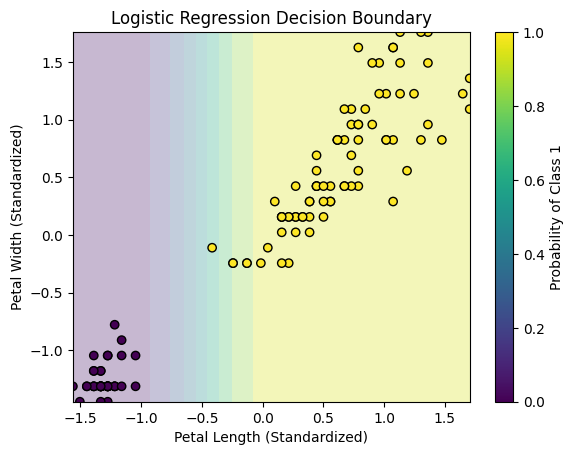

Saving figure logistic_regression_l1_norm_decision_boundary


<Figure size 640x480 with 0 Axes>

In [14]:
# Predict probability grid
Z_log_l1 = log_reg_l1.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_log_l1, alpha=0.3, levels=np.linspace(0, 1, 10))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k')
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.title("Logistic Regression Decision Boundary")
plt.colorbar(label="Probability of Class 1")
plt.show()
save_fig("logistic_regression_l1_norm_decision_boundary")

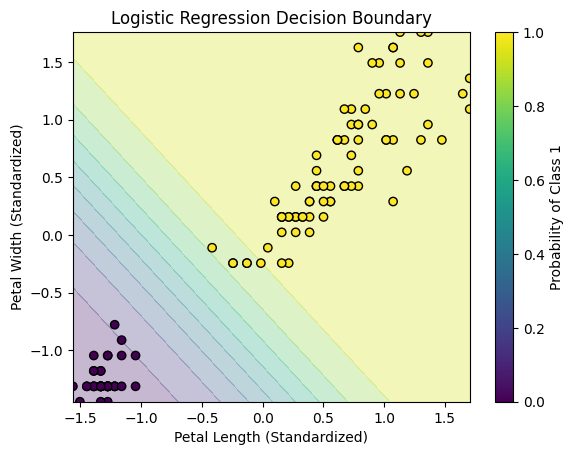

Saving figure logistic_regression_l2_norm_decision_boundary


<Figure size 640x480 with 0 Axes>

In [15]:
# Predict probability grid
Z_log_l2 = log_reg_l2.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_log_l2, alpha=0.3, levels=np.linspace(0, 1, 10))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k')
plt.xlabel("Petal Length (Standardized)")
plt.ylabel("Petal Width (Standardized)")
plt.title("Logistic Regression Decision Boundary")
plt.colorbar(label="Probability of Class 1")
plt.show()
save_fig("logistic_regression_l2_norm_decision_boundary")

**Classification Metrics**

* *Accuracy* : Overall correctness.
* *Precision* : Avoiding false positives.
* *Recall* : Capturing all true positives.
* *F1-score* : Balance between precision and recall.
* *Confusion matrix* : Counts correct and incorrect classifications.


In [16]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_l1 = log_reg_l1.predict(X_test_scaled)
y_pred_l2 = log_reg_l2.predict(X_test_scaled)

# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc_l1 = accuracy_score(y_test, y_pred_l1)
prec_l1 = precision_score(y_test, y_pred_l1)
rec_l1 = recall_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)

acc_l2 = accuracy_score(y_test, y_pred_l2)
prec_l2 = precision_score(y_test, y_pred_l2)
rec_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print(f"Accuracy (original): {acc:.4f}")
print(f"Accuracy (lasso): {acc_l1:.4f}")
print(f"Accuracy (ridge): {acc_l2:.4f}")

Accuracy (original): 1.0000
Accuracy (lasso): 1.0000
Accuracy (ridge): 1.0000


In [17]:
print(f"Precision (original): {prec:.4f}")
print(f"Precision (lasso): {prec_l1:.4f}")
print(f"Precision (ridge): {prec_l2:.4f}")

Precision (original): 1.0000
Precision (lasso): 1.0000
Precision (ridge): 1.0000


In [18]:
print(f"Recall (original): {rec:.4f}")
print(f"Recall (lasso): {rec_l1:.4f}")
print(f"Recall (ridge): {rec_l2:.4f}")

Recall (original): 1.0000
Recall (lasso): 1.0000
Recall (ridge): 1.0000


In [19]:
print(f"F1-score (original): {f1:.4f}")
print(f"F1-score (lasso): {f1_l1:.4f}")
print(f"F1-score (ridge): {f1_l2:.4f}")

F1-score (original): 1.0000
F1-score (lasso): 1.0000
F1-score (ridge): 1.0000


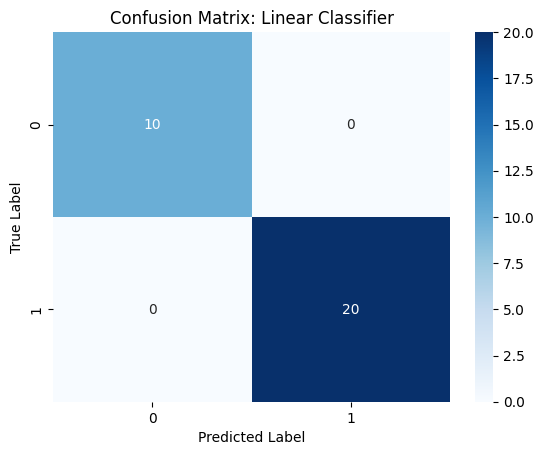

Saving figure linear_classifier_confusion_matrix


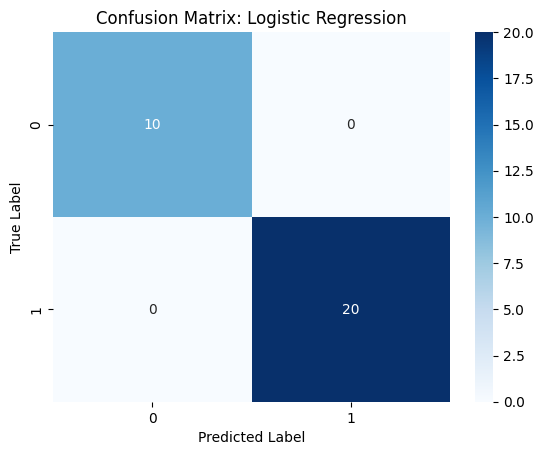

Saving figure logistic_regression_confusion_matrix


<Figure size 640x480 with 0 Axes>

In [20]:
y_linear = perceptron.predict(X_test_scaled)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_linear)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Linear Classifier")
plt.show()
save_fig("linear_classifier_confusion_matrix")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Logistic Regression")
plt.show()
save_fig("logistic_regression_confusion_matrix")